In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from collections import namedtuple
plt.style.use('ggplot')

In [35]:
def de_casteljau(t, control_points):
    b = np.asarray(control_points, dtype=np.float64)
    n = len(b)
    for j in range(1,n):
        for i in range(n-j):
            b[i] = (1-t)*b[i] + t*b[i+1]
    return b[0]

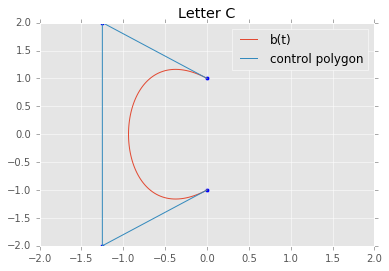

In [56]:
ts = np.linspace(0,1,100)
controls = [(0,1), (-1.25, 2), (-1.25, -2), (0,-1)]
points = [de_casteljau(t, controls) for t in ts]
xs = [x for x,y in points]
ys = [y for x,y in points]
plt.plot(xs,ys, label='b(t)')
control_x, control_y = zip(*(controls))
plt.ylim(-2,2)
plt.xlim(-2,2)
plt.title("Letter C")
plt.scatter(control_x, control_y)
plt.plot(control_x, control_y, label='control polygon')
plt.legend()
plt.show()

In [74]:
# 1 0 0 1 gives identity
# a b c d
# assignment seems to have wrong info on parameter order for cm
# x_new = a * x + c * y
# y_new = b * x + d * y
pdf = (np.array([1.5,2.5]) + np.array([controls])) * 100
pdf = [int(e) for l in pdf[0] for e in l]
print(pdf)
string = """
1 0 0.3 1 0 0 cm
%s %s m
%s %s %s %s %s %s c
""" % tuple(pdf)
print(string)

[150, 350, 25, 450, 25, 50, 150, 150]

1 0 0.3 1 0 0 cm
150 350 m
25 450 25 50 150 150 c



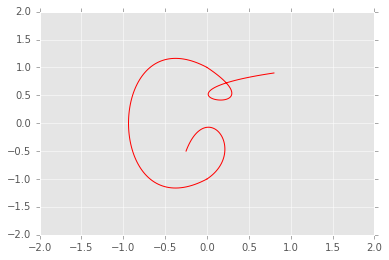

In [93]:
def bezier_plot(controls, ts):
    points = [de_casteljau(t, controls) for t in ts]
    xs = [x for x,y in points]
    ys = [y for x,y in points]
    plt.plot(xs,ys, 'r')
    
ts = np.linspace(0,1,100)
bezier_plot([(0,1), (-1.25, 2), (-1.25, -2), (0,-1)], ts)
#bezier_plot([(0,1), (1.5,0), (-1.0, 0.5), (0.8,0.9)], ts)
bezier_plot([(0,1), (1,0), (-1.0, 0.5), (0.8,0.9)], ts)
bezier_plot([(0,-1), (0.5, -0.5), (0,0.5), (-0.25,-0.5)], ts)
plt.ylim(-2,2)
plt.xlim(-2,2)
plt.show() 